文本向量化

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import jieba
import re
import pandas as pd
import numpy as np


In [2]:
file_path = r"../data/raw/xiaomi.csv"
df = pd.read_csv(file_path)
df

,username,content,likecount,date
0,SupremeWow,小米su7强势破圈太火爆了，雷总得抓紧提高产能啊,3025,2024/3/30 12:22
1,及米侠,感觉这次黑稿不太多，看来车圈还是更干净一些！,1725,2024/3/30 12:23
2,小麦Elite,小米手机1代回忆～,1020,2024/3/30 12:22
3,米12U,雷总辛苦了 感谢您为大家做了一辆Dream car,660,2024/3/30 12:22
4,Spider_boy666,雷总加电,650,2024/3/30 12:23
...,...,...,...,...
4568,春夏秋冬湖,欢迎雷军�,0,2024/5/18 19:58
4569,四季的暖窝,雷总，能不能发售ARE U OK大字母 运动包 能不能开MI家HOTEL，用SU7接送客人到MI家,0,2024/5/18 19:48
4570,米粉玩车局,中国平安的平安车险，未经本人允许，滥用本人姓名、电话、身份证信息，连续一个月车险客服电话骚扰...,0,2024/5/18 17:45
4571,浦东机场上空的轰鸣,不想体验你们的最新科技，雷嗨,0,2024/5/18 17:42


In [3]:
# 删除 '内容' 列中包含空值的所有行
df = df.dropna()

# 删除重复
df = df.drop_duplicates()
df.shape

(3591, 4)

In [4]:
stopwords_file = '../data/lexicon/stopwords_cn.txt'
stopwords=[]

#读取停用词文件并添加到停用词列表
with open(stopwords_file,'r', encoding='utf-8') as f:
    for line in f: # 遍历文件中的每一行
        stopwords.append(line.strip())

#分词处理函数，包括去除停用词和标点符号
def tokenize(text):
    if not isinstance(text, str):
        return np.nan
    words = jieba.cut(text)
    filtered_words = [word for word in words if word not in stopwords and word.strip()]
    filtered_text = ''.join(filtered_words)
    filtered_text_no_punctuation = re.sub(r'[^\w\s]', '', filtered_text)
    return filtered_text_no_punctuation

df['content'] = df['content'].apply(lambda x: str(x) if pd.notnull(x) else '')
# 这一行代码的作用是确保review列中的每个值都被转换为字符串类型，并处理可能存在的缺失值（NaN）

# 对每一行文本进行分词处理，使用 apply 函数
df['tokenized_text'] = df['content'].apply(tokenize)


# 遍历整张表格
words = []
for i, row in df.iterrows():
    word = jieba.cut(row['tokenized_text'])   # ← 注意这里用的是原始 content
    result = ' '.join(word)
    words.append(result)
# print(words)
vect = CountVectorizer()
X = vect.fit_transform(words)
X = X.toarray()

words_bag = vect.vocabulary_

words_bag

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/ln/vtlcjcd5303gxd313xg81ygw0000gn/T/jieba.cache
Loading model cost 0.366 seconds.
Prefix dict has been built successfully.


{'小米': 2935,
 'su7': 399,
 '强势': 3270,
 '破圈': 5248,
 '火爆': 4815,
 '总得': 3445,
 '抓紧': 3692,
 '提高': 3909,
 '产能': 1044,
 '感觉': 3529,
 '这次': 6377,
 '黑稿': 7118,
 '不太多': 718,
 '看来': 5172,
 '车圈': 6218,
 '干净': 3106,
 '手机': 3609,
 '回忆': 2331,
 '雷总': 6772,
 '辛苦': 6301,
 '感谢您': 3531,
 'dreamcar': 255,
 '雷总加': 6793,
 '今天': 1106,
 '早上': 4163,
 '发布会': 2018,
 '尤其': 2957,
 '汽车': 4598,
 '最后': 4269,
 '鞠躬': 6943,
 '泪目': 4675,
 '相信': 5149,
 '总有一天': 3450,
 '全球': 1440,
 '一条': 535,
 '道路': 6513,
 '看到': 5169,
 '驰骋': 7031,
 '身影': 6195,
 '年轻人': 3141,
 '特别': 4929,
 '喜欢': 2296,
 '定位': 2806,
 '成功': 3541,
 '梦想': 4461,
 '年轻': 3140,
 '人造': 1100,
 '雷总祝': 6855,
 '大卖': 2514,
 '体验': 1239,
 '拉满': 3741,
 '驾驶': 7042,
 '爱好者': 4892,
 '首选': 7021,
 '车模': 6241,
 '一点': 548,
 '根本': 4448,
 '买不到': 937,
 '交付': 1025,
 '时间': 4178,
 '网友': 5569,
 '生产': 5006,
 '相机': 5156,
 '价格': 1161,
 '下来': 676,
 '觉得': 5908,
 '公路': 1468,
 '车雷': 6267,
 '认准': 5940,
 '一定': 515,
 '成为': 3540,
 '中国': 854,
 '新能源': 4097,
 '龙头': 7128,
 '买股': 956,
 '买车': 961,
 '十年'

In [5]:
words

['小米 su7 强势 破圈 火爆 雷 总得 抓紧 提高 产能',
 '感觉 这次 黑稿 不太多 看来 车圈 更 干净',
 '小米 手机 1 代 回忆',
 '雷总 辛苦 感谢您 做 Dreamcar',
 '雷总加 电',
 '今天 早上 雷总 发布会 尤其 汽车 发布会 最后 鞠躬 泪目',
 '相信 总有一天 全球 一条 道路 看到 小米 汽车 驰骋 身影',
 '年轻人 特别 喜欢 SU7 定位 成功',
 '梦想 年轻 人造 车',
 '雷总祝 小米 汽车 大卖',
 '体验 拉满',
 '驾驶 爱好者 首选',
 '雷总 车模 一点 根本 买不到',
 '交付 时间',
 '雷总 网友 生产 相机 价格 干 下来 觉得',
 '公路 车雷 总',
 '认准 小米 汽车 一定 成为 中国 新能源 汽车 龙头 买股 买车',
 '十年 前求 父母 买红米 note1 十年 后求 父母 买 su7',
 '家 游戏 剑 网三要 凉 赛事 组 关系户 操作 比赛',
 '望雷 总 尽快 推出 1015w 走量 车型 毕竟 多数 米粉 打工 阶层',
 '懂 呀 无能为力 年纪 遇到 最想 买车',
 '雷总 出款 相机 喜欢 小米 摄影',
 '真的假 看到 有 博主发',
 '雷神 啥时候 出红米 车车',
 '雷总 朋友圈 潮人 超级 喜欢 小米 汽车 美哭',
 'SUV 外观 像 卡宴 一样 帅气 拖家带口 轿车 空间 不够 买 两辆车 经济 条件 跟不上',
 '你家 关系户 已经 游戏 嚯 嚯 热 搜 管管',
 'suv 雷总',
 'prohud 呀',
 '小米 汽车 出 圈 女性 用户 很多 大学 里 课堂 热议 小米 汽车 老师 小米 汽车 举 例子',
 '一幫人 打着 米粉 旗號 各大車 企 直播 間 搗 亂 看來 想要 替樹 敵快 發個 聲名 處理',
 '米粉 看到 小米 长大 开心',
 '兜里 没 钱',
 'Model3 车主 换车 雷 总能 来个 互关',
 '上午 一遍 雷总 发布会 采访 这条 微博 发现 频繁 cueSU7 防晒 为啥 我会 留意到 前两天 有个 朋友 老婆 雷总讲 防晒 打动 女生 有没有 女生 评论 区点 对 重要',
 '老百姓 需要 小米 就造 yyds',
 '雷总 生产 相机 相机 价格 

In [6]:
# 只看词，不看编号
words_bag2 = vect.get_feature_names_out()
df_wordsfreq = pd.DataFrame(X, columns=words_bag2)
df_wordsfreq

,00,001,007,03racing,05,10,100,1000,1000g,1001,...,黑马,默认,鼓励,鼓舞,齐全,龙头,龙晶,龙湖,龙科技,龙腾虎跃
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


CountVectorizer 只考虑词的出现次数, TfidfVectorizer 生成的矩阵表示每个词在每个文档中的 TF-IDF 权重

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
# words = [' '.join(tokens) for tokens in df['tokenized_text']]
words

['小米 su7 强势 破圈 火爆 雷 总得 抓紧 提高 产能',
 '感觉 这次 黑稿 不太多 看来 车圈 更 干净',
 '小米 手机 1 代 回忆',
 '雷总 辛苦 感谢您 做 Dreamcar',
 '雷总加 电',
 '今天 早上 雷总 发布会 尤其 汽车 发布会 最后 鞠躬 泪目',
 '相信 总有一天 全球 一条 道路 看到 小米 汽车 驰骋 身影',
 '年轻人 特别 喜欢 SU7 定位 成功',
 '梦想 年轻 人造 车',
 '雷总祝 小米 汽车 大卖',
 '体验 拉满',
 '驾驶 爱好者 首选',
 '雷总 车模 一点 根本 买不到',
 '交付 时间',
 '雷总 网友 生产 相机 价格 干 下来 觉得',
 '公路 车雷 总',
 '认准 小米 汽车 一定 成为 中国 新能源 汽车 龙头 买股 买车',
 '十年 前求 父母 买红米 note1 十年 后求 父母 买 su7',
 '家 游戏 剑 网三要 凉 赛事 组 关系户 操作 比赛',
 '望雷 总 尽快 推出 1015w 走量 车型 毕竟 多数 米粉 打工 阶层',
 '懂 呀 无能为力 年纪 遇到 最想 买车',
 '雷总 出款 相机 喜欢 小米 摄影',
 '真的假 看到 有 博主发',
 '雷神 啥时候 出红米 车车',
 '雷总 朋友圈 潮人 超级 喜欢 小米 汽车 美哭',
 'SUV 外观 像 卡宴 一样 帅气 拖家带口 轿车 空间 不够 买 两辆车 经济 条件 跟不上',
 '你家 关系户 已经 游戏 嚯 嚯 热 搜 管管',
 'suv 雷总',
 'prohud 呀',
 '小米 汽车 出 圈 女性 用户 很多 大学 里 课堂 热议 小米 汽车 老师 小米 汽车 举 例子',
 '一幫人 打着 米粉 旗號 各大車 企 直播 間 搗 亂 看來 想要 替樹 敵快 發個 聲名 處理',
 '米粉 看到 小米 长大 开心',
 '兜里 没 钱',
 'Model3 车主 换车 雷 总能 来个 互关',
 '上午 一遍 雷总 发布会 采访 这条 微博 发现 频繁 cueSU7 防晒 为啥 我会 留意到 前两天 有个 朋友 老婆 雷总讲 防晒 打动 女生 有没有 女生 评论 区点 对 重要',
 '老百姓 需要 小米 就造 yyds',
 '雷总 生产 相机 相机 价格 

In [9]:
words = pd.Series(words)
words

0       小米 su7 强势 破圈 火爆 雷 总得 抓紧 提高 产能
1             感觉 这次 黑稿 不太多 看来 车圈 更 干净
2                        小米 手机 1 代 回忆
3                雷总 辛苦 感谢您 做 Dreamcar
4                               雷总加 电
                    ...              
3586                            红米 汽车
3587                    小米 fold3 为啥 造
3588                              suv
3589                               雷总
3590                               第一
Length: 3591, dtype: object

In [10]:
# 初始化TfidfVectorizer实例
vectorizer = TfidfVectorizer()

# 将文档转换为TF-IDF向量，转换完成后，tfidf_matrix是一个稀疏矩阵
tfidf_matrix = vectorizer.fit_transform(words)

# 打印词汇表
print("Vocabulary:", vectorizer.get_feature_names_out())


# 获取特定词语的索引
word_index = vectorizer. vocabulary_.get('specific_word')
# # 如果该索引存在，则打印其在各个文档中的TF-IDF值
if word_index is not None:
    word_tfidf_values = tfidf_matrix[:, word_index].toarray()
    print("TF-IDF values of the specific word: ", word_tfidf_values)

Vocabulary: ['00' '001' '007' ... '龙湖' '龙科技' '龙腾虎跃']


In [11]:

tfidf_df = tfidf_matrix.toarray()
tfidf = pd.DataFrame(tfidf_df, columns = vectorizer.get_feature_names_out())
tfidf

,00,001,007,03racing,05,10,100,1000,1000g,1001,...,黑马,默认,鼓励,鼓舞,齐全,龙头,龙晶,龙湖,龙科技,龙腾虎跃
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 23427 stored elements and shape (3591, 7133)>

这个 TF-IDF 矩阵有 3591 行和 7133 列。
有 23427 个非零元素

In [13]:
nonzero_ratio = np.count_nonzero(tfidf_df) / tfidf_df.size
print("nonzero ratio:", nonzero_ratio)

nonzero ratio: 0.0009145954750889561


In [15]:
# 找出全零行索引
zero_rows = np.where(tfidf_matrix.getnnz(axis=1) == 0)[0]
print("全零向量行：", zero_rows)

全零向量行： [  69  198  221  251  253  262  267  276  386  390  422  480  484  495
  496  518  523  531  561  667  694  698  722  776  823  878  895  962
  963  967 1054 1065 1149 1277 1283 1395 1454 1478 1503 1507 1520 1599
 1614 1759 1761 1812 1819 2013 2023 2030 2163 2237 2325 2367 2387 2388
 2405 2422 2490 2573 2670 2673 2697 2742 2780 2823 2880 3005 3012 3207
 3286 3299 3470]


In [34]:
# 删除全零行
if len(zero_rows) > 0:
    mask = np.ones(tfidf_matrix.shape[0], dtype=bool)
    mask[zero_rows] = False
    X_nonzero = tfidf_matrix[mask]
else:
    X_nonzero = tfidf_matrix

In [35]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

# 降维，不能用pca，因为太稀疏了
svd = TruncatedSVD(n_components=100, random_state=42)  # 降到100维
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X_svd = lsa.fit_transform(X_nonzero)

聚类

In [36]:
# KMeans
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=10)
k_data = kms.fit_predict(tfidf_matrix)
k_data


array([5, 1, 8, ..., 2, 1, 1], dtype=int32)

In [37]:
k_svd = kms.fit_predict(X_svd)
k_svd

array([3, 3, 0, ..., 8, 7, 1], dtype=int32)

In [38]:
print(pd.Series(k_data).value_counts())
# 看每个类有多少

1    2341
4     430
5     271
8     174
2     146
6      68
7      64
9      36
0      35
3      26
Name: count, dtype: int64


In [39]:
words_ary = np.array(words)
words_ary[k_data == 9]
# words_ary[k_data == 4]

array(['雷总 网友 生产 相机 价格 干 下来 觉得', '雷总 求求 最后 一次 创业 房子 价格 下来',
       '雷总卷 一卷 相机 富士 佳能 价格 下来 相信', '国人 外观 科技 速度 激情 全方位 发展 加 价格',
       '雷 总能 健身器材 价格 下来', '搞 微单 相机 相机 价格 下来 全 画幅 中 画幅 安排 镜头 价格',
       '雷总 价格 13ultar 一样 价格 小米 13Proaisp', '雷总 搜索 解锁 bl 价格',
       '小米 汽车 雷总用 一次 创业 肯定 成功 赶紧 SUV 联合 企业 AED 价格 彻底 下来 基本 五位数 三五千 觉得 可能 救命 雷总 AED 改成 SU7 标配',
       '雷总 想要 小米 价格 有点 高 便宜 点', '雷爸 进军 体育 市场 运动用品 下来 羽毛球',
       '雷总 可能 造 公路 车 价格 下来', '自行车 价格 下来', '雷总 老百姓 住房价格 下来',
       '雷 叔叔 先 小米 滑板车 1S 捡 下来 3 年 反倒 贵', '雷总 相机 价格 下来 求求',
       '雷总 呼声 很大 考虑 造么 主要 价格 下来', '雷总 啥时候 电动 轮椅 轮椅车 头 价格 下来', '脱毛 仪 价格',
       '雷总 无人机 价格 下来', '雷 总能 放价 下来',
       '想要 小米 SUV 满足 我家 出行 雷总 价格 下来 理想 太贵 想要 223 布局 谢谢',
       '搞 微单 相机 相机 价格 下来 全 画幅 中 画幅 安排 镜头 价格',
       '雷总 啥时候 准备 进军 数码相机 市场 帮 理光 价格 下来', '雷总 下次 进发 房地产 房子 价格 下来',
       '期待 雷总 羽毛球 价格 下来', '雷 布斯 啥时候 服务器 价格 下来',
       '雷总 发展 房地产 房价 下来 造 年轻人 第一 套房', '雷总请 专用 冲洗 液 硬性 角膜 接触 镜 价格 下来',
       '雷总 支持 价格 以后 更加 亲民',
       '雷总 生产 相机 对标 富士 xs20x100v 佳能 g7x 系列 俩 居高不下 

In [40]:
# DBSACN
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.5,min_samples=3)
d_data = dbs.fit_predict(tfidf)
d_data

array([-1, -1, -1, ..., 49, 10, -1])

In [41]:
# 降维
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.5,min_samples=3)
d_svd = dbs.fit_predict(X_svd)
d_svd

array([-1,  0,  1, ..., 15, 24, 28])

/var/folders/ln/vtlcjcd5303gxd313xg81ygw0000gn/T/ipykernel_51874/3939243439.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


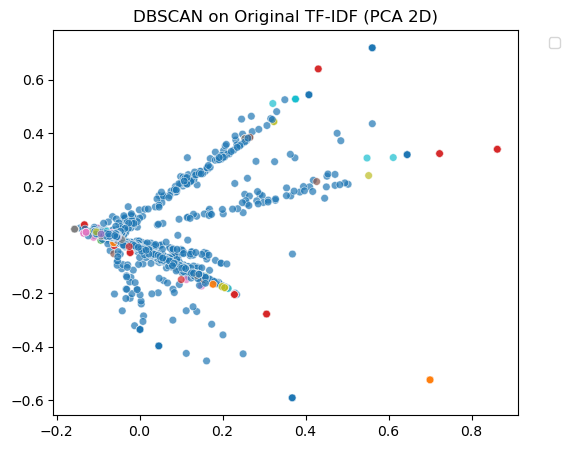

/var/folders/ln/vtlcjcd5303gxd313xg81ygw0000gn/T/ipykernel_51874/3939243439.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


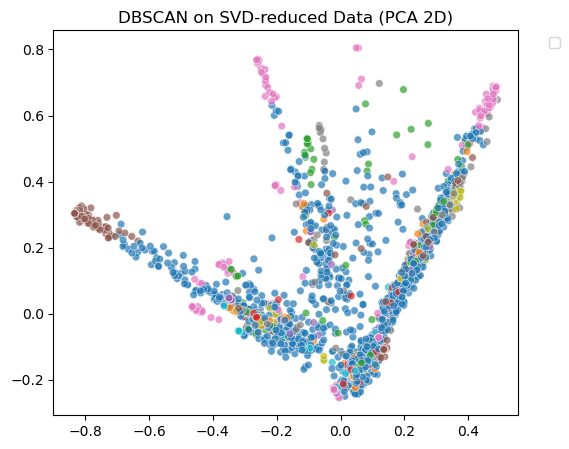

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Step 1: 统一降到2维（先用PCA，速度快；你也可以换t-SNE看看效果）
pca_tfidf = PCA(n_components=2, random_state=42).fit_transform(tfidf_matrix.toarray())
pca_svd   = PCA(n_components=2, random_state=42).fit_transform(X_svd)

# Step 2: 可视化函数
def plot_clusters(X_2d, labels, title):
    plt.figure(figsize=(6,5))
    sns.scatterplot(
        x=X_2d[:,0], y=X_2d[:,1],
        hue=labels, palette="tab10", s=30, alpha=0.7, legend=False
    )
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Step 3: 对比绘图
plot_clusters(pca_tfidf, d_data, "DBSCAN on Original TF-IDF (PCA 2D)")
plot_clusters(pca_svd, d_svd, "DBSCAN on SVD-reduced Data (PCA 2D)")

In [43]:
# 分类会细一点，但也没好到哪里去

In [44]:
# 将聚类标签添加到DataFrame中
df['DBcluster'] = d_svd
df['KMcluster'] = k_svd
df.head()

ValueError: Length of values (3518) does not match length of index (3591)

In [45]:
# 转换 DBcluster 列为数值类型
df['DBcluster'] = pd.to_numeric(df['DBcluster'])

# 提取 DBcluster 列的最高值
max_cluster_value = df['DBcluster'].max()
max_cluster_value

177

In [46]:
count_negative_1 = df[df['DBcluster'] == -1]
count_negative_1

,username,content,likecount,date,tokenized_text,DBcluster,KMcluster
0,SupremeWow,小米su7强势破圈太火爆了，雷总得抓紧提高产能啊,3025,2024/3/30 12:22,小米su7强势破圈火爆雷总得抓紧提高产能,-1,7
4,Spider_boy666,雷总加电,650,2024/3/30 12:23,雷总加电,-1,6
5,柴柴chaial啊,我今天看了一早上雷总的发布会，尤其在汽车发布会最后那个鞠躬，让人泪目,469,2024/3/30 12:25,今天早上雷总发布会尤其汽车发布会最后鞠躬泪目,-1,8
6,不喝薄荷奶绿_,相信总有一天 在全球的每一条道路上都能看到小米汽车驰骋的身影,392,2024/3/30 12:23,相信总有一天全球一条道路看到小米汽车驰骋身影,-1,3
7,钟雨飞,年轻人特别喜欢SU7，定位太成功了！！！,297,2024/3/30 12:24,年轻人特别喜欢SU7定位成功,-1,6
...,...,...,...,...,...,...,...
4153,睡不饱狂战士,把那些傻子的订金退了吧,0,2024/3/30 12:23,傻子订金退,-1,8
4155,王富贵QW,中午好,5,2024/3/30 12:23,中午,-1,7
4158,灵魂hom,为雷总点赞,0,2024/3/30 12:22,为雷总点赞,-1,8
4159,导个演,有没有为理想车主而造？,0,2024/3/30 12:22,有没有理想车主而造,-1,7


In [47]:
# 余弦相似度
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(X_svd)
cosine_similarities

array([[ 1.00000000e+00,  3.88811318e-02,  9.23839100e-02, ...,
        -1.29788145e-03, -3.18704241e-04,  2.26612503e-02],
       [ 3.88811318e-02,  1.00000000e+00,  3.22399520e-03, ...,
        -1.96042880e-03, -1.66470646e-03,  1.10179102e-01],
       [ 9.23839100e-02,  3.22399520e-03,  1.00000000e+00, ...,
         2.42352451e-03, -1.97242222e-03, -7.96927925e-03],
       ...,
       [-1.29788145e-03, -1.96042880e-03,  2.42352451e-03, ...,
         1.00000000e+00,  2.43969642e-03,  3.82233547e-03],
       [-3.18704241e-04, -1.66470646e-03, -1.97242222e-03, ...,
         2.43969642e-03,  1.00000000e+00, -2.93219737e-04],
       [ 2.26612503e-02,  1.10179102e-01, -7.96927925e-03, ...,
         3.82233547e-03, -2.93219737e-04,  1.00000000e+00]])

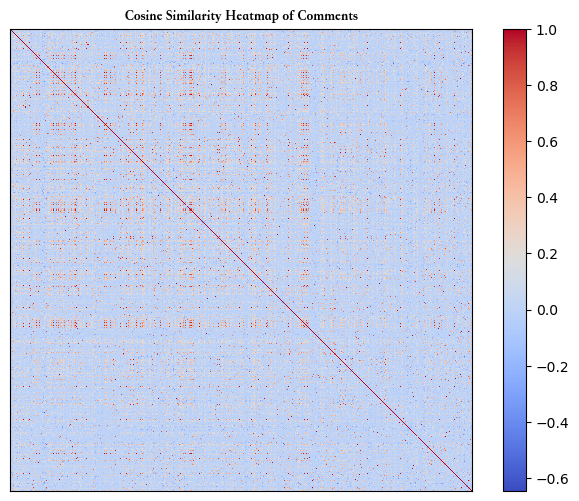

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# 设置字体属性
font_path = "/System/Library/Fonts/Supplemental/Songti.ttc" 
font_prop = FontProperties(fname=font_path)


# 可视化相似度矩阵
plt.figure(figsize=(8, 6))
plt.imshow(cosine_similarities, interpolation='nearest', cmap='coolwarm')
plt.colorbar()
plt.title('Cosine Similarity Heatmap of Comments', fontproperties=font_prop)
# 不显示坐标轴上的标签
plt.xticks([])
plt.yticks([])

plt.tick_params(axis='both', which='both', length=0)  # 隐藏刻度线

# 保存图表
output_path = r'../outputs/figures/clustering/cosine_similarity_heatmap.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


KMeans 本质上是基于欧氏距离的算法

In [49]:
print(cosine_similarities.shape)

(3518, 3518)


In [50]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
cos_sim = cosine_similarity(X_nonzero)
# Spectral Clustering 
spectral = SpectralClustering(
    n_clusters=2, affinity='precomputed', random_state=42
)
labels_spectral = spectral.fit_predict(cosine_similarities)

# 层次聚类 (直接用原始TF-IDF或余弦距离)
agglo = AgglomerativeClustering(n_clusters=2, metric='cosine', linkage='average')
labels_agglo = agglo.fit_predict(X.toarray())

# 可视化 (SVD降到2维统一画图)
def plot_clusters(X_2d, labels, title):
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=labels, palette="tab10", s=60, alpha=0.8, legend=False)
    plt.title(title)
    plt.show()

plot_clusters(X_reduced, labels_kmeans, "KMeans after SVD")
plot_clusters(X_reduced, labels_spectral, "Spectral Clustering (Cosine Similarity)")
plot_clusters(X_reduced, labels_agglo, "Agglomerative Clustering (Cosine Distance)")

/opt/anaconda3/lib/python3.13/site-packages/scipy/sparse/csgraph/_laplacian.py:554: RuntimeWarning: invalid value encountered in sqrt
  w = np.where(isolated_node_mask, 1, np.sqrt(w))


ValueError: Input contains NaN.

In [46]:

# 计算 k_data 和 label 中每个不同数字的个数
unique_k, counts_k = np.unique(k_data, return_counts=True)
unique_YX, counts_label = np.unique(k_dataYX, return_counts=True)

# 创建 pandas DataFrame
df_k_data = pd.DataFrame({'Value': unique_k, 'Frequency': counts_k})
df_YX = pd.DataFrame({'Value': unique_YX, 'Frequency': counts_label})

# 打印表格
print("欧式距离")
print(df_k_data)
print("余弦相似度")
print(df_YX)

欧式距离
   Value  Frequency
0      0         26
1      1        498
2      2         52
3      3        283
4      4        357
5      5         41
6      6        178
7      7         68
8      8        164
9      9       1924
余弦相似度
   Value  Frequency
0      0         45
1      1       1996
2      2        473
3      3        151
4      4         26
5      5         62
6      6        553
7      7        218
8      8         40
9      9         27


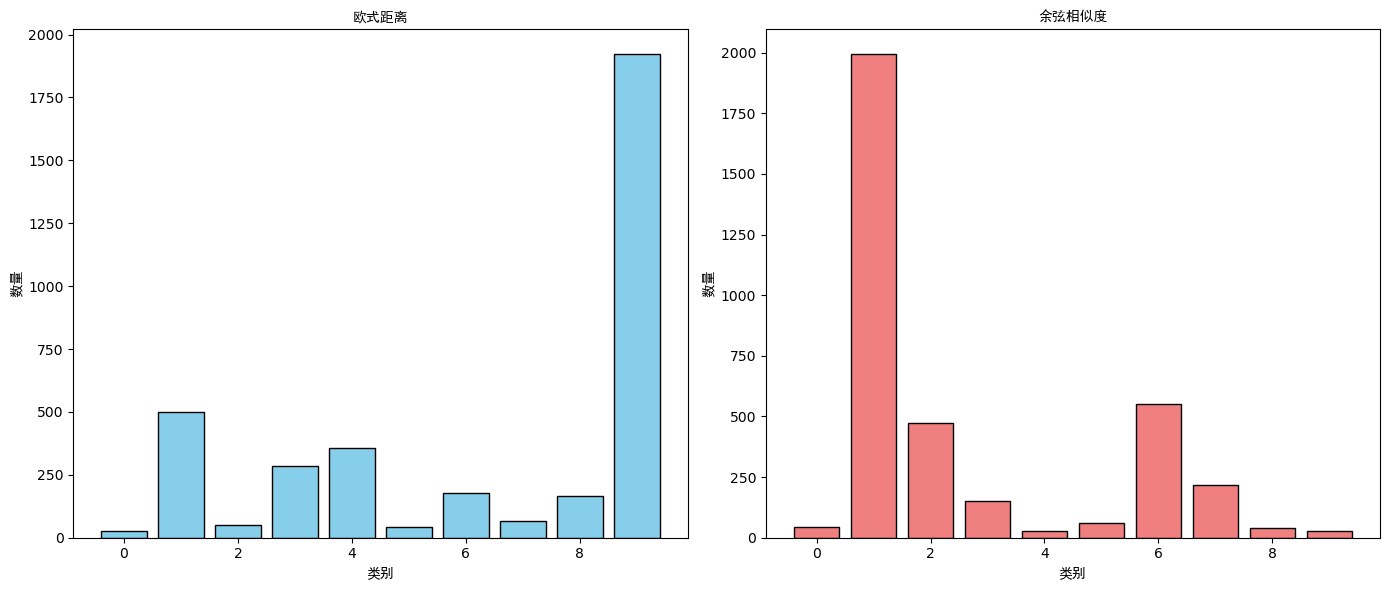

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# 设置字体属性
font_path = "C:\\Windows\\Fonts\\SimHei.ttf"  # Windows路径
font_prop = FontProperties(fname=font_path)


# 计算 k_data 和 label 中每个不同数字的个数
unique_k, counts_k = np.unique(k_data, return_counts=True)
unique_yx, counts_yx = np.unique(k_dataYX, return_counts=True)

# 创建子图
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 绘制 k_data 的柱状图
ax[0].bar(unique_k, counts_k, color='skyblue', edgecolor='black')
ax[0].set_title('欧式距离', fontproperties=font_prop)
ax[0].set_xlabel('类别', fontproperties=font_prop)
ax[0].set_ylabel('数量', fontproperties=font_prop)

# 绘制 label 的柱状图
ax[1].bar(unique_yx, counts_yx, color='lightcoral', edgecolor='black')
ax[1].set_title('余弦相似度', fontproperties=font_prop)
ax[1].set_xlabel('类别', fontproperties=font_prop)
ax[1].set_ylabel('数量', fontproperties=font_prop)


# 调整布局
plt.tight_layout()

# 保存图表
output_path = r'D:\MINE\大数据分析综合实验\大数据2102班_彭弋桐_基于小米su7评论的情感分析和数据分析\可视化\欧式距离vs余弦相似度.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')


# 显示图表
plt.show()

In [48]:
X1 = cosine_similarities

from sklearn.datasets import make_blobs  
import joblib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
k: 21
k: 22
k: 23
k: 24
k: 25
k: 26
k: 27
k: 28
k: 29
k: 30
k: 31
k: 32
k: 33
k: 34
k: 35
k: 36
k: 37
k: 38
k: 39
k: 40
k: 41
k: 42
k: 43
k: 44
k: 45
k: 46
k: 47
k: 48
k: 49
k: 50
k: 51
k: 52
k: 53
k: 54
k: 55
k: 56
k: 57
k: 58
k: 59


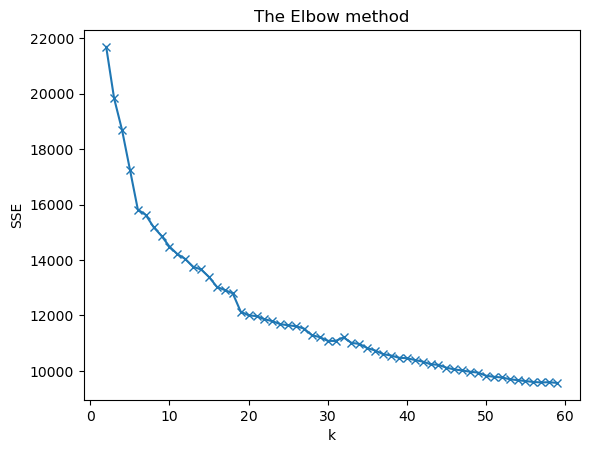

In [50]:
# 手肘法

SSE = []
k_min = 2
k_max = 60
for k in range(k_min, k_max):
    print("k:", k)
    kmeans_model = KMeans(n_clusters=k, n_init='auto',random_state=10)
    kmeans_model.fit(X1)
    SSE.append(kmeans_model.inertia_)
# 绘图
plt.figure()
plt.plot(range(k_min, k_max), SSE, marker='x')    
plt.title('The Elbow method')
plt.xlabel('k')
plt.ylabel('SSE')

# 保存图表
output_path = r'D:\MINE\大数据分析综合实验\大数据2102班_彭弋桐_基于小米su7评论的情感分析和数据分析\可视化\手肘法.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()


k: 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 6


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 7


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 8


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 9


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 11


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 12


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 13


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 14


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 15


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 16


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 17


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 18


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 19


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 20


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 21


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 22


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 23


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 24


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 26


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 27


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 28


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 29


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 30


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 31


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 32


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 33


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 34


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 35


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 36


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 37


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 38


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 39


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 40


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 41


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 42


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 43


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 44


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 45


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 46


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 47


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 48


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 49


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 50


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 51


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 52


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 53


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 54


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 55


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 56


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 57


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 58


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 59


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


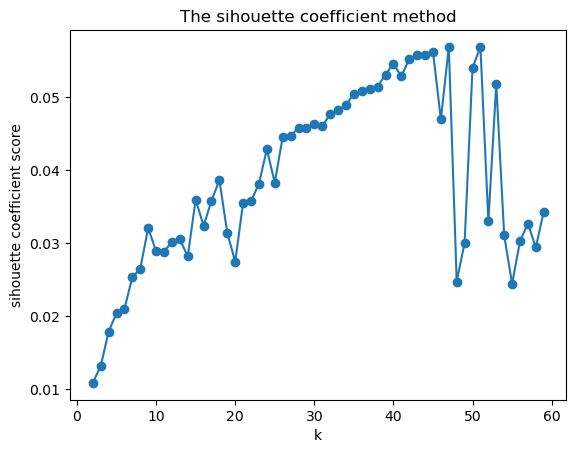

In [51]:
# 轮廓系数法，确定K值
SC = []
k_min = 2  # 轮廓系数必须从2开始
k_max = 60
for k in range(k_min, k_max):
    print("k:", k)
    kmeans_model = KMeans(n_clusters=k, random_state=10)
    kmeans_model.fit(tfidf)
    sc_score  = silhouette_score(tfidf, kmeans_model.labels_)
    SC.append(sc_score)
# 绘图
plt.figure()
plt.plot(range(k_min, k_max), SC, marker='o')    
plt.title('The sihouette coefficient method')
plt.xlabel('k')
plt.ylabel('sihouette coefficient score')

# 保存图表
output_path = r'D:\MINE\大数据分析综合实验\大数据2102班_彭弋桐_基于小米su7评论的情感分析和数据分析\可视化\轮廓系数法.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

k: 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 6


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 7


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 8


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 9


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 11


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 12


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 13


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 14


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 15


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 16


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 17


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 18


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 19


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 20


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 21


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 22


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 23


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 24


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 26


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 27


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 28


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 29


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 30


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 31


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 32


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 33


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 34


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 35


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 36


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 37


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 38


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 39


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 40


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 41


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 42


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 43


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 44


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 45


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 46


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 47


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 48


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 49


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 50


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 51


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 52


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 53


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 54


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 55


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 56


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 57


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 58


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 59


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


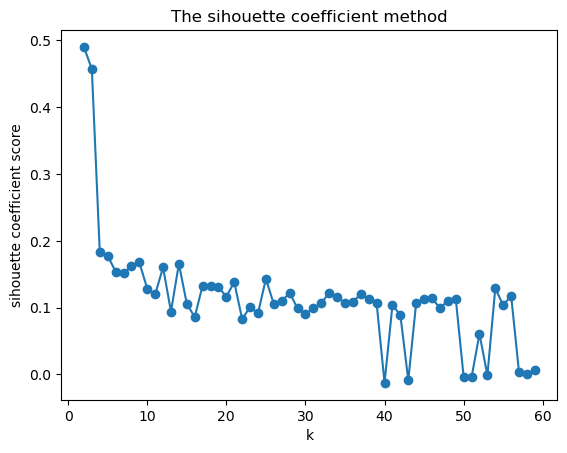

In [49]:
# # 轮廓系数法用余弦相似度预测，确定K值
# SC = []
# k_min = 2  # 轮廓系数必须从2开始
# k_max = 60
# for k in range(k_min, k_max):
#     print("k:", k)
#     kmeans_model = KMeans(n_clusters=k, random_state=10)
#     kmeans_model.fit(cosine_similarities)
#     sc_score  = silhouette_score(cosine_similarities, kmeans_model.labels_)
#     SC.append(sc_score)
# # 绘图
# plt.figure()
# plt.plot(range(k_min, k_max), SC, marker='o')    
# plt.title('The sihouette coefficient method')
# plt.xlabel('k')
# plt.ylabel('sihouette coefficient score')
# plt.show()